# Anime Dataset Exploration from myanimelist.net


## Libraries

In [1]:
from pathlib import Path

from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Connect to Google Drive

In [2]:
 # connect to Drive files
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
path = Path("drive/My Drive/DSCI 641: Project")

## Anime Metadata Dataset

* file: anime.csv

* fields:
  * anime_id - myanimelist.net's unique id identifying an anime.
  * name - full name of anime.
  * genre - comma separated list of genres for this anime.
  * type - movie, TV, OVA, etc.
  * episodes - how many episodes in this show. (1 if movie).
  * rating - average rating out of 10 for this anime.
  * members - number of community members that are in this anime's "group".

In [4]:
anime_df = pd.read_csv(path / "dataset/2017" /"anime.csv")
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### Data Set Size

There are 12,294 unique items.

In [5]:
anime_df.shape

(12294, 7)

In [6]:
anime_df.anime_id.nunique()

12294

### Different Anime Types

* OVA = Original Video Animation, can be entire series/movies or extras for existing series. But they're typically far shorter than a full televised series -- sometimes only a single 30-minute episode or a short film

* Specials = Extras for existing series, mostly BD bonus. Basically special OVAs.

* ONA = Original Net Animation, basically animes distributed online rather than DVD/Blu-ray

TV, OVA, Movie, Special, and ONA are all valid types of shows. We'll filter out music, since it's not the content we want to recommend.

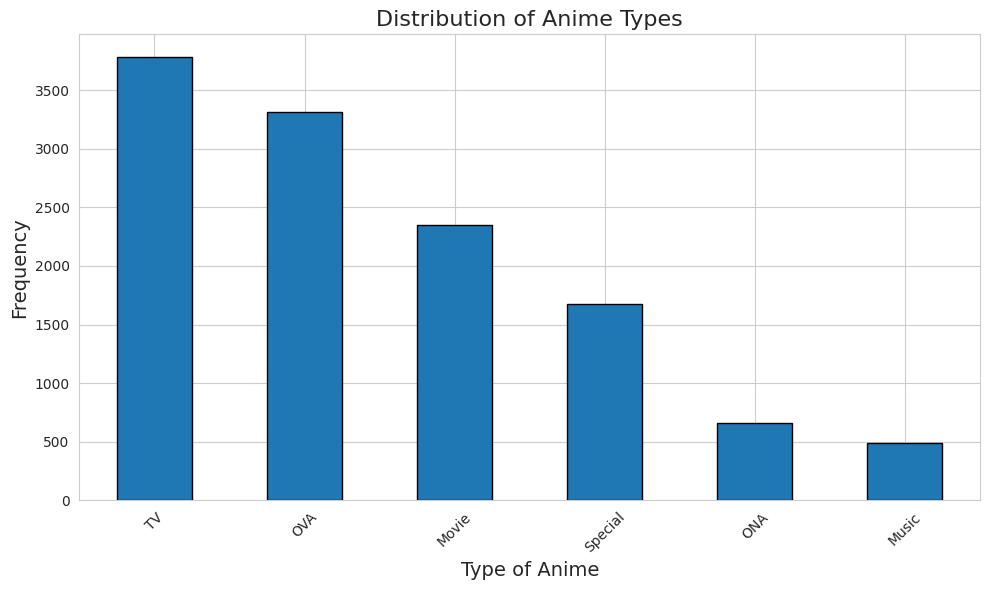

In [13]:
plt.figure(figsize=(10, 6))
anime_df['type'].value_counts().plot(kind="bar", edgecolor="black")

# Adding aesthetics
plt.title("Distribution of Anime Types", fontsize=16)
plt.xlabel("Type of Anime", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


After filtering, let's see what's the most popular by members count. We can Death Note, Shingeki no Kyojin (or more popularly known as Attack on Titan), Sword Art Online (SAO), and Fullmetal Alchemist: Brotherhood (FMA).

In [14]:
anime_df = anime_df.query("type != 'Music'").sort_values(by="members", ascending=False)

## Anime Ratings Dataset

* file: rating.csv

* fields
  * user_id - non identifiable randomly generated user id.
  * anime_id - the anime that this user has rated.
  * rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).


In [15]:
ratings_df = pd.read_csv(path / "dataset/2017" / "rating.csv")
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [19]:
rated_count

6337241

<ipython-input-17-c8709a2fe0c9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Rated', 'Unrated'], rotation=45)


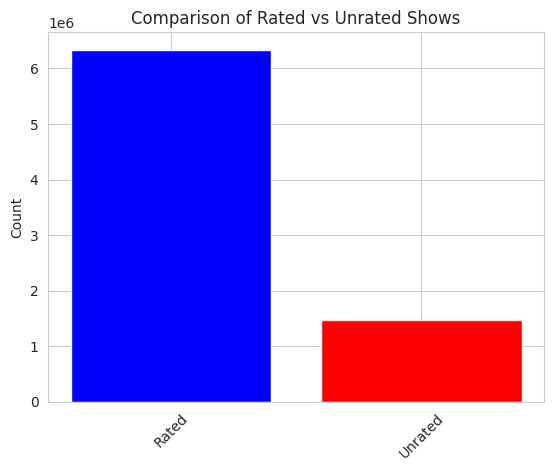

In [17]:
value_counts = ratings_df['rating'].value_counts()

# Separate rated and unrated
unrated_count = value_counts.get(-1, 0)  # Get the count for '-1', defaulting to 0 if not found
rated_count = value_counts.sum() - unrated_count  # Subtract unrated count from total to get rated count

# Prepare data for plotting
summary_data = {'Rated': rated_count, 'Unrated': unrated_count}

# Plotting
fig, ax = plt.subplots()
ax.bar(summary_data.keys(), summary_data.values(), color=['blue', 'red'])

# Adding labels and title for clarity
ax.set_ylabel('Count')
ax.set_title('Comparison of Rated vs Unrated Shows')
ax.set_xticklabels(['Rated', 'Unrated'], rotation=45)

plt.show()


In [ ]:
ratings_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


### Dataset Size
There are 73,515 unique users and 7,813,737 ratings.

In [ ]:
ratings_df.shape

(7813737, 3)

In [ ]:
ratings_df.user_id.nunique()

73515

### User Activity

In [ ]:
user_stats = ratings_df.groupby('user_id')['rating'].agg(['mean', 'count'])

<ipython-input-51-eb605ced7f88>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_stats['count'])


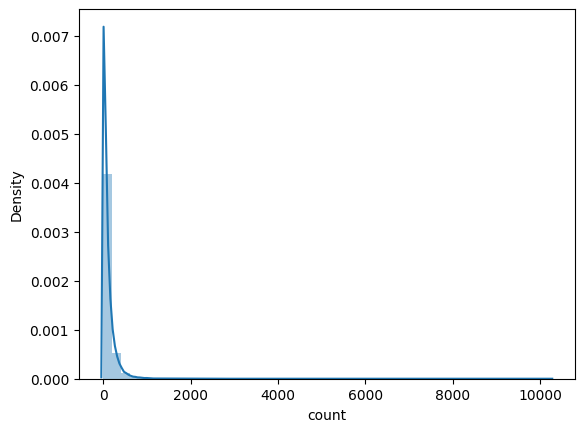

In [ ]:
sns.distplot(user_stats['count'])
plt.show()

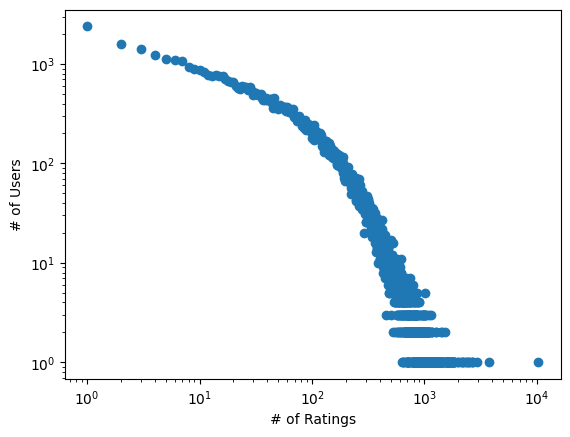

In [ ]:
uact_hist = user_stats['count'].value_counts()
plt.scatter(uact_hist.index, uact_hist)
plt.xlabel('# of Ratings')
plt.xscale('log')
plt.ylabel('# of Users')
plt.yscale('log')

### Item Popularity

In [ ]:
anime_stats = ratings_df.groupby('anime_id')['rating'].agg(['mean', 'count', 'sum'])
anime_stats.head()

,mean,count,sum
anime_id,,,
1,7.558514,15509,117225
5,6.890284,6927,47729
6,6.980590,11077,77324
7,6.040320,2629,15880
8,5.113801,413,2112


<Axes: xlabel='count', ylabel='Proportion'>

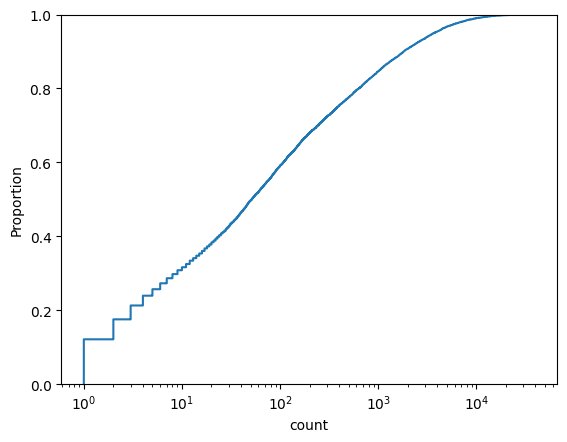

In [ ]:
sns.ecdfplot(anime_stats['count'], log_scale=True)

### Rating Statistics

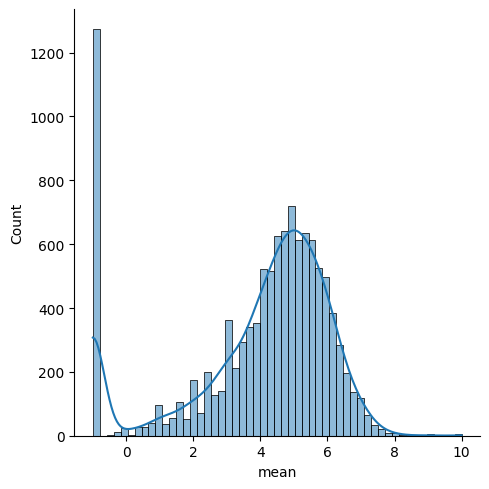

In [ ]:
sns.displot(anime_stats['mean'], kde=True)

### Non-Personalized Recommendations

In [ ]:
global_mean = ratings_df['rating'].mean()
global_mean

6.144029546937656

### Popular by Rating Count

In [ ]:
anime_stats.nlargest(10, 'count').merge(anime_df, on="anime_id", how="left")

,anime_id,mean,count,sum,tot_rank_frac,cum_frac,name,genre,type,episodes,rating,members
0,1535,7.556177,39340,297260,0.911014,198.620666,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
1,11757,6.863159,30583,209896,0.910932,254.206487,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
2,16498,7.314089,29584,216380,0.910851,261.756828,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
3,1575,7.641244,27718,211800,0.910769,278.311206,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
4,226,6.753508,27506,185762,0.910688,279.448557,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
5,6547,7.278667,27183,197856,0.910607,281.757201,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
6,20,6.571726,25925,170372,0.910525,294.380829,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
7,121,7.056048,25032,176627,0.910444,303.846996,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
8,5114,8.028933,24574,197303,0.910363,308.491332,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
9,4224,7.234938,24283,175686,0.910281,311.176214,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


### Popular by Avg. Rating
Never heard of any of these except, `Kimi no Na wa` and `Steins;Gate 0`

In [ ]:
anime_stats.nlargest(10, 'mean').merge(anime_df, on="anime_id", how="left")

,anime_id,mean,count,sum,tot_rank_frac,cum_frac,name,genre,type,episodes,rating,members
0,31211,10.000000,1,10,0.061412,755.000000,Choegang Top Plate,"Action, Comedy, Kids, Sports",TV,26,7.20,86
1,33484,10.000000,1,10,0.070441,866.000000,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
2,34252,10.000000,1,10,0.073694,906.000000,STAR BEAT!: Hoshi no Kodou,Music,Music,1,6.39,230
3,33791,10.000000,1,10,0.074996,922.000000,Warui no wo Taose!! Salaryman Man,"Comedy, Parody",ONA,1,5.04,74
4,30939,9.000000,1,9,0.060517,744.000000,Shiranpuri,"Drama, School",OVA,1,6.18,155
5,29837,9.000000,1,9,0.063852,785.000000,"Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, V...","Mystery, Police, Supernatural",Special,1,5.97,190
6,31972,9.000000,1,9,0.078331,963.000000,Tang Lang Bu Chan,Historical,Movie,1,5.90,112
7,32422,9.000000,2,18,0.157557,1258.000000,Doukyuusei,"Kids, Music",Music,1,5.83,116
8,30484,8.500000,4,34,0.205303,1098.000000,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
9,32281,8.297863,2199,18247,0.833252,1069.063665,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


### Popular by Damped Mean Rating

In [ ]:
damping = 5
anime_stats['damped'] = (anime_stats['sum'] + (damping * global_mean)) / (anime_stats['count'] + damping)

In [ ]:
anime_stats.nlargest(10, 'damped').merge(anime_df, on="anime_id", how="left")

,anime_id,mean,count,sum,tot_rank_frac,cum_frac,damped,name,genre,type,episodes,rating,members
0,32281,8.297863,2199,18247,0.833252,1069.063665,8.292976,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,820,8.239203,903,7440,0.761510,1210.894795,8.227665,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
2,9253,8.126796,19283,156709,0.909468,380.529534,8.126282,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
3,5114,8.028933,24574,197303,0.910363,308.491332,8.028550,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
4,28977,7.956710,1386,11028,0.798845,1159.401876,7.950194,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
5,11061,7.924082,8575,67949,0.898568,667.268571,7.923044,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
6,4181,7.835275,17854,139891,0.908980,404.695082,7.834802,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
7,19,7.809099,4594,35875,0.877176,890.452547,7.807289,Monster,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,8.72,247562
8,918,7.775231,4974,38674,0.880673,863.906313,7.773593,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
9,2904,7.765943,24242,188262,0.910200,310.700809,7.765609,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
